# Advance Plotting with Matplotlib and Seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df  = pd.read_csv("tips.csv")

In [4]:
df.shape

(244, 7)

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [8]:
df["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [9]:
df.loc[df["size"] == df["size"].max(), ["day", "time"]]

,day,time
125,Thur,Lunch
141,Thur,Lunch
143,Thur,Lunch
156,Sun,Dinner


In [10]:
df["time"].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [17]:
#missing value
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [21]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

# Univariate Non Viz  Statistical Analysis

In [22]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [24]:
discreate = df.select_dtypes(include=['object'])

In [25]:
discrete_univariate_analysis(discreate)

********** sex **********
count                 244
nunique                 2
unique     [Female, Male]
Name: sex, dtype: object
Value Counts: 
 sex
Male      157
Female     87
Name: count, dtype: int64

********** smoker **********
count            244
nunique            2
unique     [No, Yes]
Name: smoker, dtype: object
Value Counts: 
 smoker
No     151
Yes     93
Name: count, dtype: int64

********** day **********
count                        244
nunique                        4
unique     [Sun, Sat, Thur, Fri]
Name: day, dtype: object
Value Counts: 
 day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

********** time **********
count                  244
nunique                  2
unique     [Dinner, Lunch]
Name: time, dtype: object
Value Counts: 
 time
Dinner    176
Lunch      68
Name: count, dtype: int64



In [23]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(["count",'min', 'max', 'mean', 'median', 'std']))
        print()

In [26]:
numerical = df.select_dtypes(include=["int64", "float64"])

In [27]:
numerical_univariate_analysis(numerical)

********** total_bill **********
count     244.000000
min         3.070000
max        50.810000
mean       19.785943
median     17.795000
std         8.902412
Name: total_bill, dtype: float64

********** tip **********
count     244.000000
min         1.000000
max        10.000000
mean        2.998279
median      2.900000
std         1.383638
Name: tip, dtype: float64

********** size **********
count     244.000000
min         1.000000
max         6.000000
mean        2.569672
median      2.000000
std         0.951100
Name: size, dtype: float64



# Bivariate - Non Viz Statistical Analysis

In [28]:
#num vs num
numerical.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [30]:
#cat vs cat
pd.crosstab(discreate["sex"], discreate["smoker"], normalize="index")

smoker,No,Yes
sex,,
Female,0.620690,0.379310
Male,0.617834,0.382166


In [35]:
discreate.pivot_table(values="smoker",
                     index ="sex",
                     aggfunc="count")

,smoker
sex,
Female,87
Male,157


In [32]:
#num vs cat
grp = df.groupby("sex")
grp["total_bill"].agg(["min","max","mean","median"])

,min,max,mean,median
sex,,,,
Female,3.07,44.30,18.056897,16.40
Male,7.25,50.81,20.744076,18.35


# Univariate Plotting For Numerical Columns - Histogram, KDE, CDF and Box Plot

In [36]:
# TIOTAL_BILL - HIST, BOX PLOT AND KDE, ECDF

<Axes: xlabel='total_bill', ylabel='Count'>

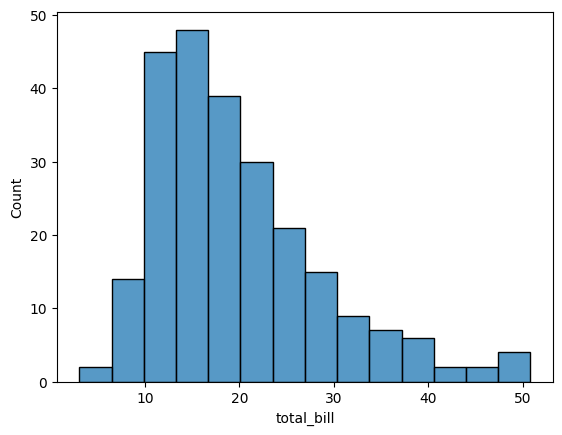

In [38]:
sns.histplot(data = df, x="total_bill")

<Axes: xlabel='total_bill'>

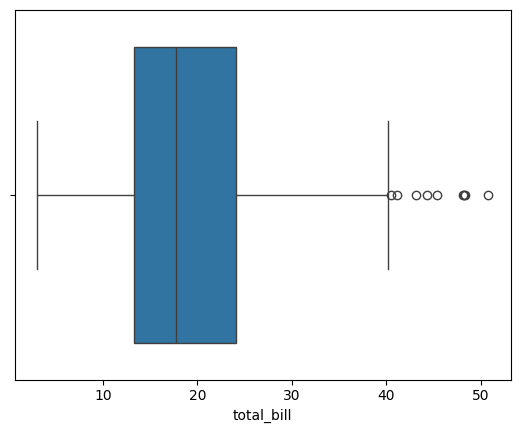

In [39]:
sns.boxplot(data = df, x="total_bill")

<Axes: xlabel='total_bill', ylabel='Density'>

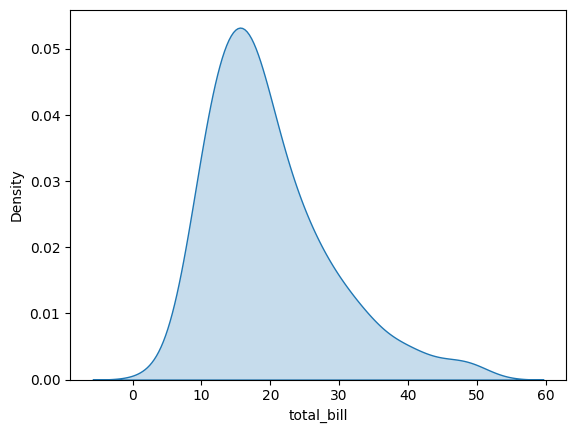

In [41]:
sns.kdeplot(data = df, x="total_bill", fill = True)

<Axes: xlabel='total_bill', ylabel='Proportion'>

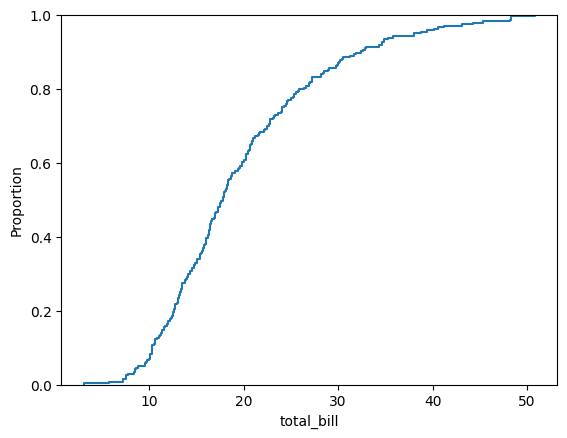

In [42]:
sns.ecdfplot(data = df, x="total_bill")

<Axes: title={'center': 'ECDF'}, xlabel='total_bill', ylabel='Proportion'>

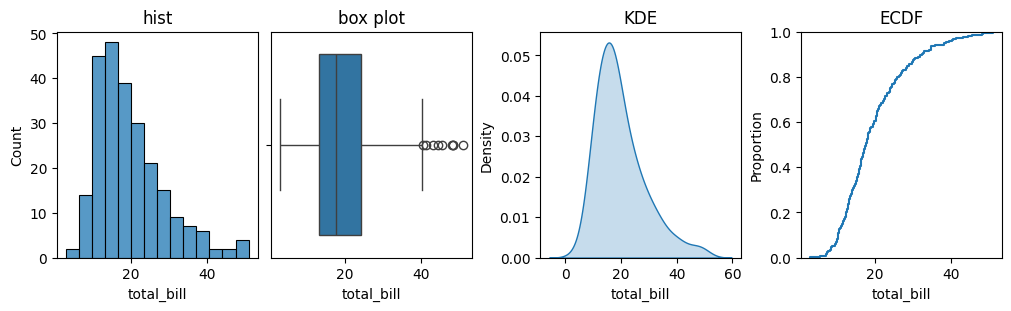

In [64]:
fig , axs = plt.subplots(1,4, figsize =(10,3), layout="constrained")
axs[0].set_title("hist")
sns.histplot(data = df, x="total_bill", ax = axs[0])
axs[1].set_title("box plot")
sns.boxplot(data = df, x="total_bill", ax= axs[1])
axs[2].set_title("KDE")
sns.kdeplot(data = df, x="total_bill", fill = True,ax=axs[2])
axs[3].set_title("ECDF")
sns.ecdfplot(data = df, x="total_bill", ax=axs[3])


# Univariate Plotting For Categorical Columns - Count Plot

<Axes: xlabel='day', ylabel='count'>

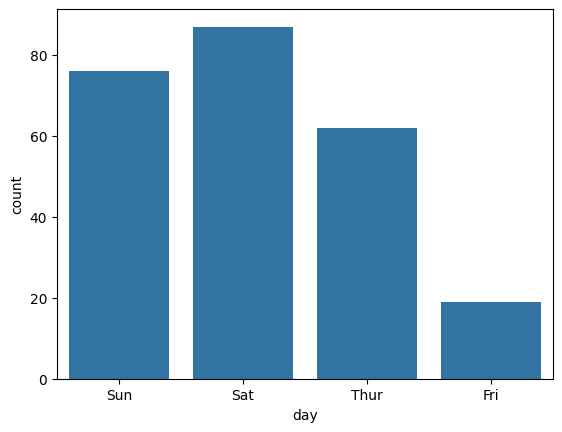

In [11]:
sns.countplot(data=df, x='day')

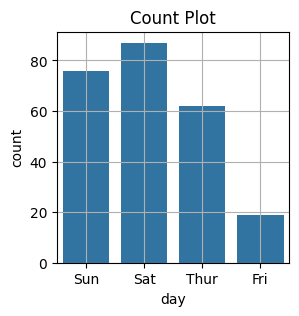

In [12]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Count Plot")
sns.countplot(data=df, x='day', ax=ax)

plt.grid(True)

plt.show()

# Bivariate Plotting For Num vs Num Columns - Line Plot, Scatter Plot, Heat Map and Pair Plot

<Axes: xlabel='total_bill', ylabel='tip'>

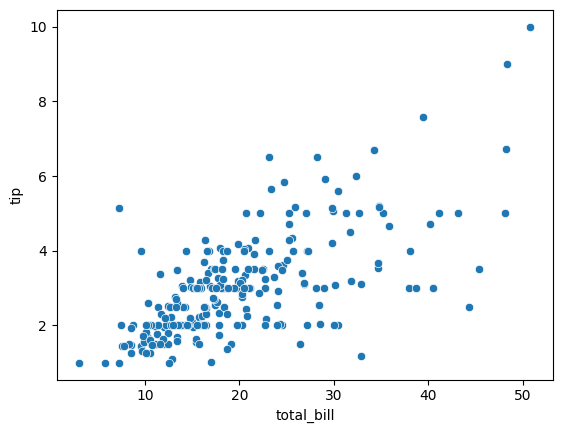

In [13]:
sns.scatterplot(data=df, x='total_bill', y='tip')

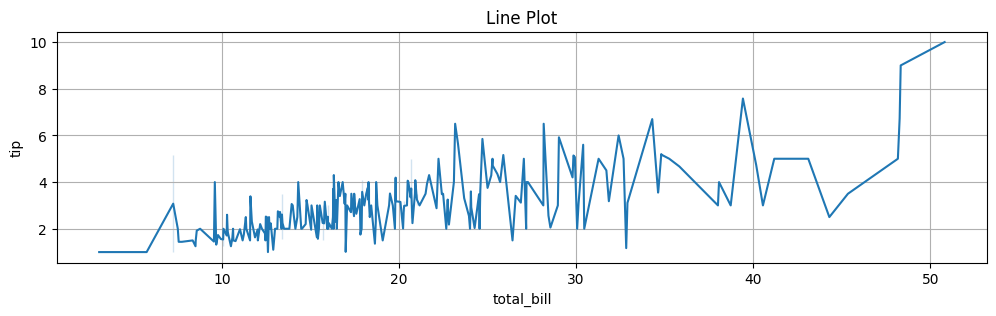

In [14]:
fig, ax = plt.subplots(figsize=(12,3))

ax.set_title("Line Plot")
sns.lineplot(data=df, x='total_bill', y='tip', ax=ax)

plt.grid(True)

plt.show()

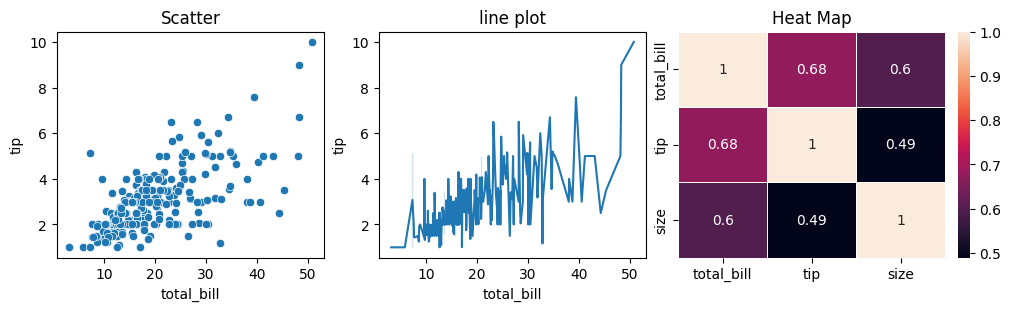

In [20]:
fig , axs = plt.subplots(1,3, figsize =(10,3), layout="constrained")
axs[0].set_title("Scatter")
sns.scatterplot(data = df, x="total_bill", y = "tip", ax = axs[0])
axs[1].set_title("line plot")
sns.lineplot(data = df, x="total_bill",y="tip", ax= axs[1])
axs[2].set_title("Heat Map")
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, linewidths=0.5, ax=axs[2])

plt.show()

C:\Users\laxmi\anaconda3\envs\Datascience\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


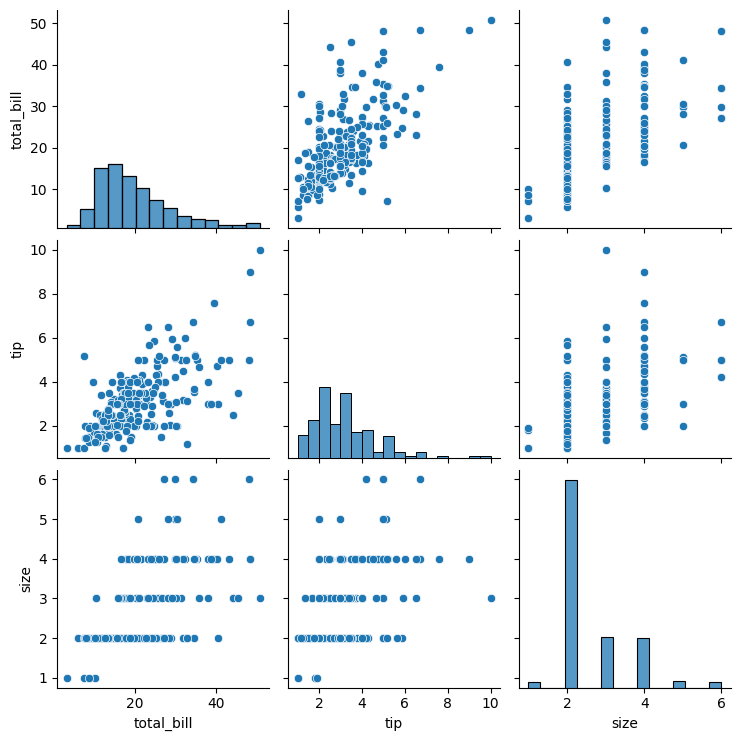

In [72]:
sns.pairplot(df)  #apply for only for numerical columns

C:\Users\laxmi\anaconda3\envs\Datascience\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


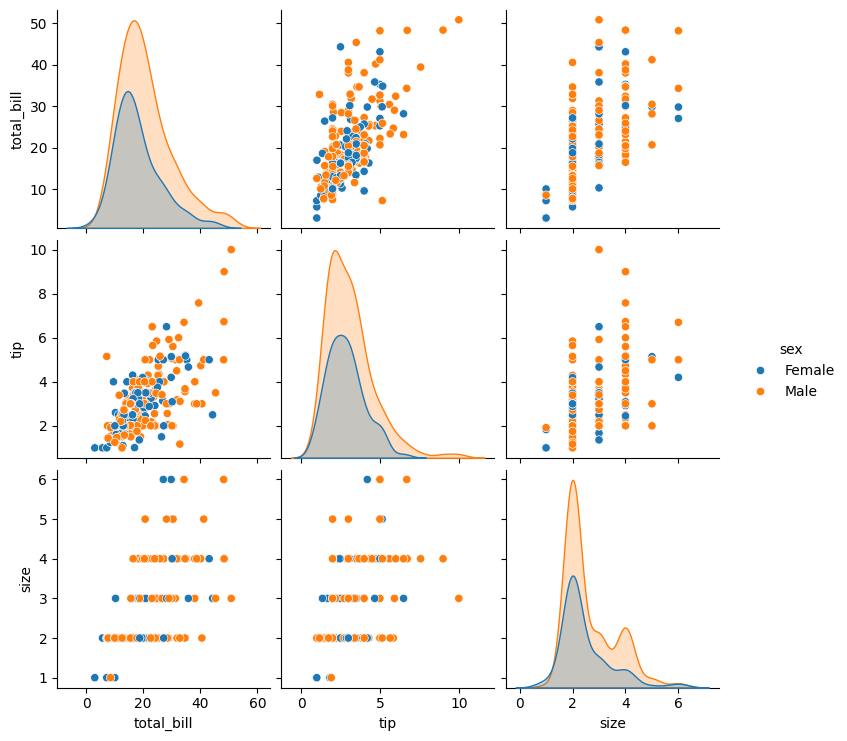

In [73]:
sns.pairplot(df, hue="sex")  # hue always tack the categorical columns only.

# Bivariate Plotting For Num vs Categorical Columns - Box Plot, Violin Plot, Boxen Plot and Histogram Plot

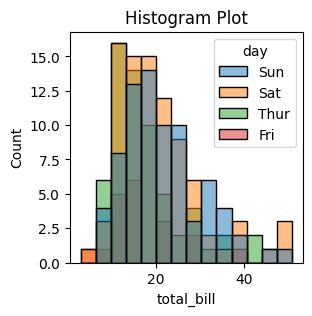

In [5]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Histogram Plot")
sns.histplot(data=df, x='total_bill', hue="day", alpha=0.5, ax=ax)

plt.show()

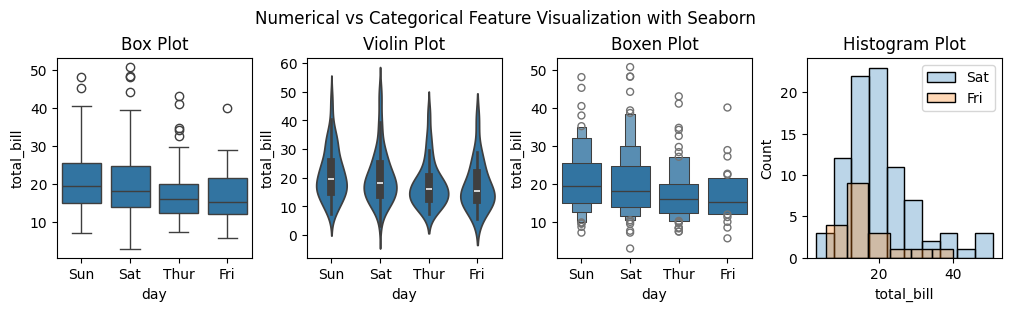

In [6]:
fig, axs = plt.subplots(1, 4, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Numerical vs Categorical Feature Visualization with Seaborn")

axs[0].set_title("Box Plot")
sns.boxplot(data=df, x='day', y='total_bill', ax=axs[0])

axs[1].set_title("Violin Plot")
sns.violinplot(data=df, x='day', y='total_bill', ax=axs[1])

axs[2].set_title("Boxen Plot")
sns.boxenplot(data=df, x='day', y='total_bill', ax=axs[2])

axs[3].set_title("Histogram Plot")
sns.histplot(data=df.loc[df['day']=="Sat"], x='total_bill', alpha=0.3, ax=axs[3], label="Sat") #alha hels us introdusing the transparancy
sns.histplot(data=df.loc[df['day']=="Fri"], x='total_bill', alpha=0.3, ax=axs[3], label="Fri")
axs[3].legend()

plt.show()

# Multi-plot Grid using FacetGrid

Let's answer this question:

**Which gender pays more?**

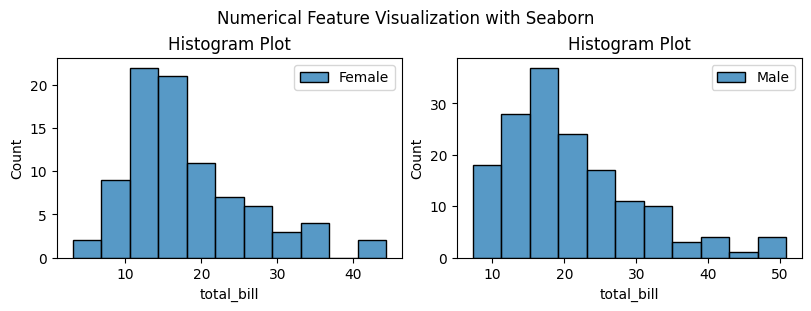

In [7]:
# Implementation without FacetGrid

fig, axs = plt.subplots(1, 2, figsize=(8, 3), constrained_layout=True)
fig.suptitle("Numerical Feature Visualization with Seaborn")

axs[0].set_title("Histogram Plot")
sns.histplot(data=df.loc[df['sex']=='Female'], x='total_bill', ax=axs[0], label="Female")
axs[0].legend()

axs[1].set_title("Histogram Plot")
sns.histplot(data=df.loc[df['sex']=='Male'], x='total_bill', ax=axs[1], label="Male")
axs[1].legend()

plt.show()

C:\Users\laxmi\anaconda3\envs\Datascience\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


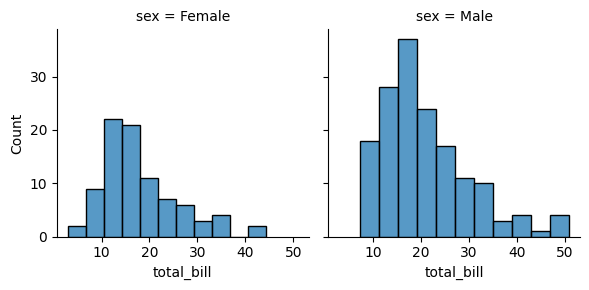

In [10]:
grid = sns.FacetGrid(df,col="sex") #row= "sex" ---> 2 rows and 1 col and col ="sex" --> 1 row , 2 col
grid.map(sns.histplot, "total_bill")

C:\Users\laxmi\anaconda3\envs\Datascience\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


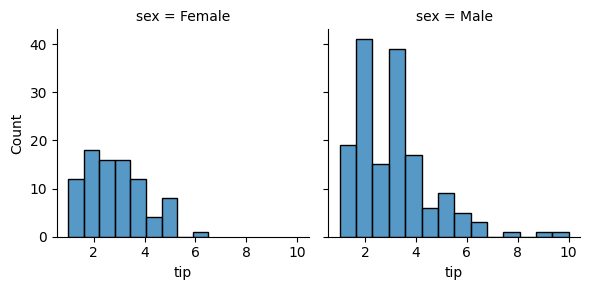

In [11]:
grid = sns.FacetGrid(df,col="sex") #row= "sex" ---> 2 rows and 1 col and col ="sex" --> 1 row , 2 col
grid.map(sns.histplot, "tip")

C:\Users\laxmi\anaconda3\envs\Datascience\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


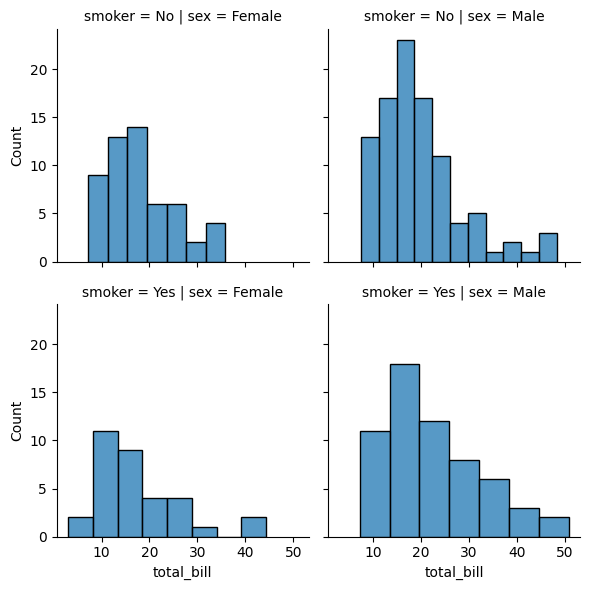

In [12]:
grid = sns.FacetGrid(df,col="sex",row = "smoker") #row= "sex" ---> 2 rows and 1 col and col ="sex" --> 1 row , 2 col
grid.map(sns.histplot, "total_bill")

C:\Users\laxmi\anaconda3\envs\Datascience\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


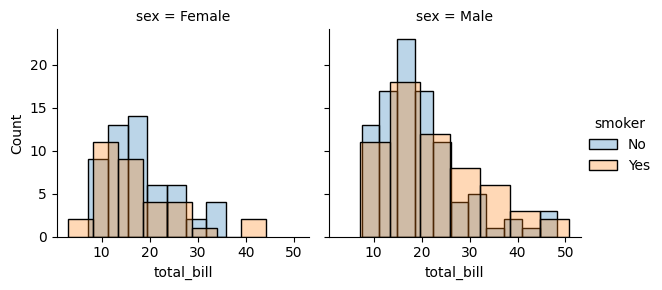

In [16]:
grid = sns.FacetGrid(df,col="sex", hue = "smoker") 
grid.map(sns.histplot, "total_bill", alpha =.3)
grid.add_legend()

C:\Users\laxmi\anaconda3\envs\Datascience\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


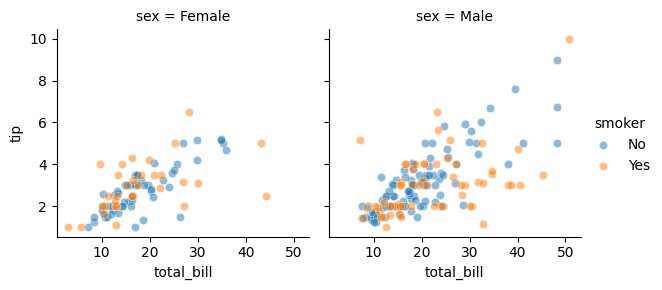

In [18]:
grid = sns.FacetGrid(df,col="sex", hue = "smoker") 
grid.map(sns.scatterplot, "total_bill","tip", alpha =.5)
grid.add_legend()

# Bivariate Plotting For Cat vs Categorical Columns - Grouped Count Plot

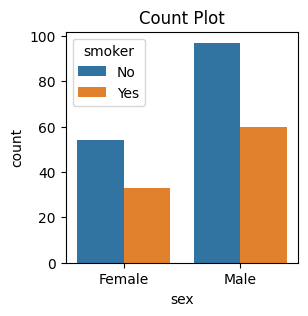

In [19]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Count Plot")
sns.countplot(data=df, x='sex', hue='smoker', ax=ax)

plt.show()
